In [ ]:
import numpy as np
import pandas as pd

In [ ]:
crop = pd.read_csv('/content/Crop_recommendation.csv')

In [ ]:
crop.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [ ]:
crop.shape

(2200, 8)

In [ ]:
crop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [ ]:
crop.isnull().sum()

,0
N,0
P,0
K,0
temperature,0
humidity,0
ph,0
rainfall,0
label,0


In [ ]:
crop.duplicated().sum()

0

In [ ]:
crop.describe() # description of all the types

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


<Axes: >

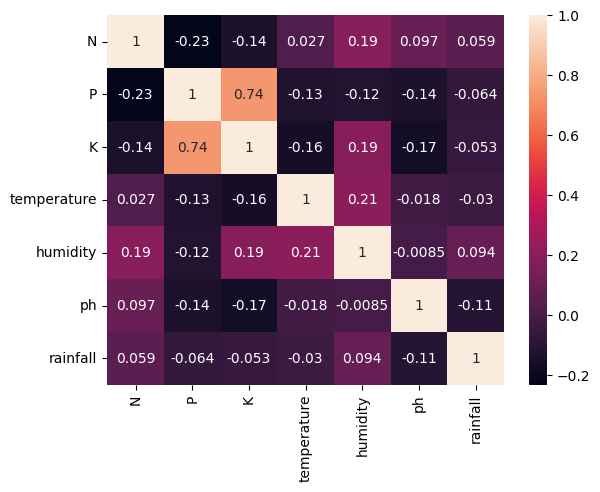

In [ ]:
import seaborn as sns
sns.heatmap(crop.iloc[:,:7].corr(),annot=True)

In [ ]:
crop['label'].value_counts()

,count
label,
rice,100
maize,100
jute,100
cotton,100
coconut,100
papaya,100
orange,100
apple,100
muskmelon,100


<Axes: xlabel='count', ylabel='label'>

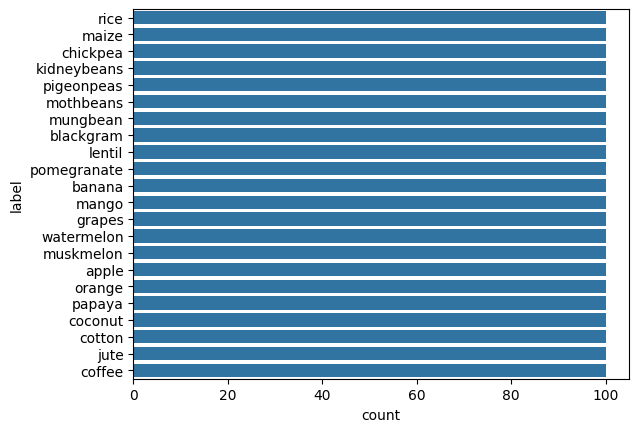

In [ ]:
import seaborn as sns
sns.countplot(y=crop['label'],data=crop)

In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
data_encoded = encoder.fit_transform(crop['label'])
print(data_encoded)

[20 20 20 ...  5  5  5]


In [ ]:
encoded_df = pd.DataFrame(data_encoded, columns=['label_num'])
crop = pd.concat([crop, encoded_df], axis=1)
crop = crop.drop('label', axis=1)

In [ ]:
x = crop.iloc[:, :-1]
y = encoded_df

In [ ]:
x.head()

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340


In [ ]:

y.head()

,label_num
0,20
1,20
2,20
3,20
4,20


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
y_train.shape

(1760, 1)

In [ ]:
y_test.shape

(440, 1)

In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x_train_scaled = ss.fit_transform(x_train)
x_test_scaled = ss.transform(x_test)

In [ ]:
x_train_scaled

array([[-9.03426596e-01, -1.12616170e+00, -6.68506601e-01, ...,
         9.36586183e-01,  1.93473784e-01,  5.14970176e-03],
       [-3.67051340e-01,  7.70358846e-01, -5.70589522e-01, ...,
        -1.00470485e-01,  8.63917548e-01, -6.05290566e-01],
       [-1.17161422e+00,  5.89737842e-01, -4.53089028e-01, ...,
        -3.82774991e-01,  1.05029771e+00, -1.04580687e+00],
       ...,
       [-1.06433917e+00, -5.24091685e-01, -3.35588533e-01, ...,
        -8.98381379e-01, -6.34357580e-04, -4.37358211e-02],
       [-1.06433917e+00,  2.12501638e+00,  3.05234239e+00, ...,
         3.86340190e-01, -1.48467347e-01, -5.69036842e-01],
       [-5.01145154e-01,  7.40255346e-01, -5.11839275e-01, ...,
        -4.18045489e-01,  6.86860180e-01, -8.96531475e-01]])

In [ ]:
y_train.shape

(1760, 1)

In [ ]:
x_train_scaled.shape

(1760, 7)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [ ]:
models = {
    'Logistic Regression': LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Naive Bayes': GaussianNB(),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

In [ ]:
y_train_try = y_train.values.ravel()
y_test_try = y_test.values.ravel()

In [ ]:
y_train_try

array([16,  2, 10, ..., 12,  7, 10])

In [ ]:
accuracies = []
for name,model in models.items():
  model.fit(x_train_scaled,y_train_try)
  y_pred = model.predict(x_test_scaled)
  accuracy = accuracy_score(y_test_try,y_pred)
  accuracies.append(accuracy)
  print(f'{name} Accuracy: {accuracy*100}')


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Logistic Regression Accuracy: 96.36363636363636
Decision Tree Accuracy: 98.63636363636363
Random Forest Accuracy: 99.31818181818181
Naive Bayes Accuracy: 99.54545454545455
K-Nearest Neighbors Accuracy: 95.68181818181817


In [ ]:
from sklearn.metrics import classification_report

y_true = y_test_try
y_preds = {}

for name, model in models.items():
    y_preds[name] = model.predict(x_test_scaled)

for name, y_pred in y_preds.items():
    print(f"Performance Metrics for {name}:\n")
    print(classification_report(y_true, y_pred))
    print("-" * 100)

Performance Metrics for Logistic Regression:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        21
           2       0.90      0.95      0.93        20
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        27
           5       0.94      1.00      0.97        17
           6       0.94      1.00      0.97        17
           7       1.00      1.00      1.00        14
           8       0.83      0.87      0.85        23
           9       0.95      0.95      0.95        20
          10       0.85      1.00      0.92        11
          11       1.00      0.95      0.98        21
          12       1.00      1.00      1.00        19
          13       1.00      0.92      0.96        24
          14       1.00      1.00      1.00        19
          15       1.00      1.00      1.00        17
          16       1.00      1.00  

In [ ]:
gnb = GaussianNB()
gnb.fit(x_train_scaled,y_train_try)
y_pred = gnb.predict(x_test_scaled)
accuracy = accuracy_score(y_test_try,y_pred)
print(f' Accuracy: {accuracy*100}')

 Accuracy: 99.54545454545455


prediciton


In [ ]:
def recommendation(n, p, k, temp, humidity, ph, rainfall):
    data = np.array([[n, p, k, temp, humidity, ph, rainfall]])
    data_scaled = ss.transform(data)
    prediction_numeric = gnb.predict(data_scaled)
    original_labels = encoder.inverse_transform(prediction_numeric)
    return original_labels

In [ ]:
predicted_crop = recommendation(85, 70, 24, 75, 43, 7, 150)
print(f"Recommended crop: {predicted_crop}")

Recommended crop: ['pigeonpeas']


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


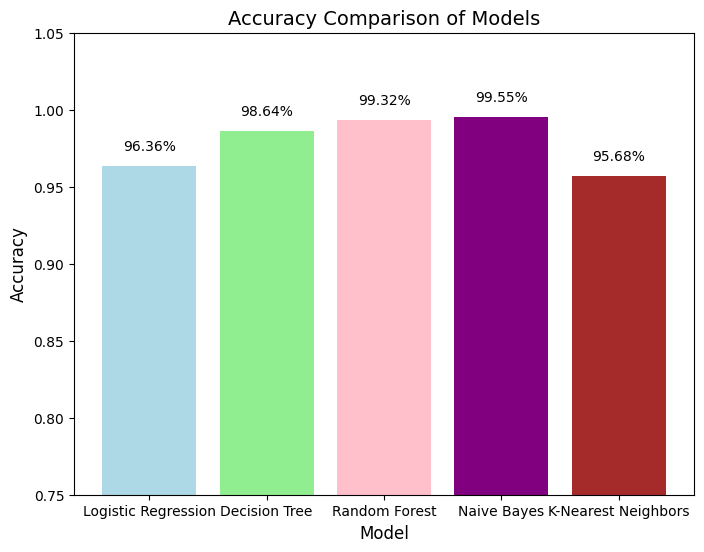

In [ ]:
import matplotlib.pyplot as plt

model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Naive Bayes', 'K-Nearest Neighbors']
plt.figure(figsize=(8, 6))
plt.bar(model_names, accuracies, color=['lightblue', 'lightgreen', 'pink', 'purple', 'brown'])

# Add title and labels
plt.title('Accuracy Comparison of Models', fontsize=14)
plt.xlabel('Model', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.ylim(0.75, 1.05)  # Adjust the y-axis range for clarity

# Annotate bars with accuracy values
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.01, f'{acc*100:.2f}%', ha='center', fontsize=10)

plt.show()
